#  Explainer Notebook for Hell's Kitchen in NYC

* Auther: Skorri Júlíusson, Wei Wang

* Course: Social Data Visualization 

## Motivation

In this project, we hope to find the correlation between sanitary condition of a restaurant in New York City and its environment. Based on restaurant inspections and rodent inspections, which represent the sanitary condition of the surrounding area. Then, we could perform machine learning algorithm to predict the sanitary condition of a restaurant or environment when either dataset is missing. However, the invetigation showed no correlation between the rodent inspection dataset and restaurant dataset. We, then, expect to based on the sanitary dataset of restaurants to build model that predict the sanitary condition of a restaurant which not included in the dataset. 

#### Choosing the Datasets

Restaurant hygiene is common to relate to rat activity. In this study, we acquire two different datasets which provide restaurant hygiene evaluation and rodent activity record. However, we found out the rodent activity record does not have correlation with the restaurant inspection dataset.

#### End user´s experience

* To know the top violation type in NYC.
* The diversity of cuisine distribution in NYC.
* What cuisine has greater or less amount of violation comparing to mean of the violation
* We want the user of our webpage to see how the grade and the average violation per inspection of Chinese restaurants is distributed in NYC. 

#### Datasets

* **Restaurant Inspection** from Department of Health and Mental Hygiene in New York City

In [1]:
## Read the data to a list of dictionary
import csv   # get the csv reader
row = {}
data = []
infile = open("DOHMH_New_York_City_Restaurant_Inspection_Result.csv", 'rb')    # open the file for reading
reader = csv.DictReader(infile, delimiter=",")

for line in reader:
    DATE = line['INSPECTION DATE']
    if int(DATE.split("/")[-1]) >= 2013:
        CAMIS = line['CAMIS'] # unique identifier for the restaurant
        DBA = line['DBA']
        ZIP = line['ZIPCODE']
        CUISINE = line['CUISINE DESCRIPTION']
        VIO_CODE = line['VIOLATION CODE']
        VIO_DESCR = line['VIOLATION DESCRIPTION']
        STREET = line['STREET']
        BUILDING = line['BUILDING']
        FLAG = line['CRITICAL FLAG']
        GRADE = line['GRADE']
        BORO = line['BORO']
        row = {'CAMIS':CAMIS,'DBA':DBA,'ZIP':ZIP,'CUISINE':CUISINE,
               'DATE':DATE,'VIO_CODE':VIO_CODE,'VIO_DESCR':VIO_DESCR,
              'STREET':STREET,'BUILDING':BUILDING,'FLAG':FLAG, 'GRADE':GRADE, 'BORO':BORO}
        data.append(row)  



* **Rodent Inspection** from Department of Health and Mental Hygiene in New York City (The rodent inspection data is barely use in the final webpage since no strong correlation to restaurant inspection dataset)

In [3]:
## Read the data to a list of dictionary
import csv   # get the csv reader
infile = open(".\Rodent_Inspection.csv", 'r')    # open the file for reading
reader = csv.DictReader(infile, delimiter=",")

data = []
row = {}

for line in reader:

    inspect_type = line['INSPECTION_TYPE']
    street = line['STREET_NAME']
    lat = line['LATITUDE']
    lon = line['LONGITUDE']
    bor = line['BOROUGH']
    date= line['INSPECTION_DATE']
    result = line['RESULT']
    loc = line['LOCATION']
    jobID = line['JOB_ID']
    zipcode = line['ZIP_CODE']
    if result != '' and lat != '' and lon != '':
        row = {'INSPECTION_TYPE':inspect_type,'STREET_NAME':street,
               'LAT':lat,'LON':lon,'BOROUGH':bor,
               'DATE':date,'RESULT':result,'LOCATION':loc, 'JOB_ID':jobID, 'ZIP_CODE':zipcode}
        data.append(row)      

## Data exploring

#### Restuarant Inspection

#### Rodent Inspection

In [4]:
n = len(data);

# How many category in data
borSet = set() # cause of death
resultSet = set() # ethnicity
inspectSet  = set() # inspection type
yearSet = set()
for i in data:
    year = i['DATE'].split('/')[-1].split(' ')[0]
    if i['INSPECTION_TYPE'] not in inspectSet:
        inspectSet.add(i['INSPECTION_TYPE'])
    if i['BOROUGH'] not in borSet:
        borSet.add(i['BOROUGH'])
    if i['RESULT'] not in resultSet:
        resultSet.add(i['RESULT'])
    if year not in yearSet and year != '' and year != '1930':
        yearSet.add(year)

print '# of rows:\n', n, '\n'
print 'INSPECTION_TYPE:\n',inspectSet,'\n'
print 'BOROUGH:\n', borSet, '\n'
print 'RESULT:\n', resultSet,'\n'
print 'YEAR:\n', yearSet,'\n'

# of rows:
951659 

INSPECTION_TYPE:
set(['INITIAL', 'BAIT', 'COMPLIANCE', 'CLEAN_UPS']) 

BOROUGH:
set(['Bronx', 'Brooklyn', 'Staten Island', 'Manhattan', 'Queens']) 

RESULT:
set(['Bait applied', 'Cleanup done', 'Passed Inspection', 'Problem Conditions', 'Active Rat Signs', 'Monitoring visit']) 

YEAR:
set(['2016', '1971', '2002', '2001', '2015', '2014', '2008', '2009', '2011', '2010', '2013', '2012']) 



### Stats of Data

* The size of the entire restaurant dataset is 161 MB. It has 465274 lines and 18 variables. We will not use all of these variables and the data will be parsed to a smaller more manageable size.
* The rodent inspection dataset is 213 MB. It has 952294 lines and 20 variables.

# Ten most frequant violations

We want to find the ten most frequent violations in the restaurant data set.

We start by creating a set of all the violations in the restaurant inspection data set.

In [13]:
violationSet = set()
for i in data:
    if i['VIO_DESCR'] not in violationSet:
        violationSet.add(i['VIO_DESCR'])

Then we create a dictionary where the violations are the keys.

In [14]:
vioDict = dict()
for i in  violationSet:
    vioDict[i] = 0

We increase the count for each violation every time we find it in the dataset.

In [15]:
for i in data:
    for j in violationSet:
        if i['VIO_DESCR'] == j:
            vioDict[j] = vioDict[j] + 1

We create a sorted list of the items in the dictionary.

In [16]:
import operator
sorted_x = sorted(vioDict.items(), key=operator.itemgetter(1))

Since the list is in accending order we take the last 10 elements. That gives us the ten most frequent violations.

In [17]:
li = []
for i in range(len(sorted_x)-11,len(sorted_x)-1):
    li.append(sorted_x[i])

# Pie chart

Each restaurant in the dataset is assigned with a unique number called Camis. We create a set of these numbers, where each enrty represents one restaurant.

In [18]:
CamisSet = set()
for i in data:
    CamisSet.add(i['CAMIS'])

Then we create a set of cuisines.

In [19]:
CuisineSet = set()
for i in data:
    CuisineSet.add(i['CUISINE'])

We create a dictionary where the cuisines are the keys.

In [20]:
CuisineDict = dict()
for i in CuisineSet:
    CuisineDict[i] = 0

Then for each entry in the dataset we loop through the cuisines and make sure we count each restaurant only once by adding its camis to a set.

In [21]:
CamSet = set()
for i in data:
    for j in CuisineDict:
        if i['CUISINE'] == j and i['CAMIS'] not in CamSet:
            CamSet.add(i['CAMIS'])
            CuisineDict[j] = CuisineDict[j]+1

Then we split the data into two different dictionaries, one for the cuisinse that have less than or equal to a hundred restaurants and one for the cuisines that have more than a hundred restaurants.

In [22]:
CuisineLess = dict()
tmpLi = []
for i in CuisineDict:
    tmpLi.append(i)
    
for i in tmpLi:
    if CuisineDict[i] <= 100:
        CuisineLess[i] = CuisineDict[i]
        CuisineDict.pop(i)

#### Rodent inspection

In [5]:
# ===============================================================
#  Density plot of active rat sign
# ===============================================================

## import library for plot
import json
import matplotlib
import matplotlib.pyplot as plt
import geoplotlib
from geoplotlib.colors import ColorMap
from geoplotlib.utils import BoundingBox, DataAccessObject

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

# Find appropriate bounding box of the NYC
lat = []
lon = []

for ii in range(0,n):
    if 30 < float(data[ii]['LAT']) <41:
        if float(data[ii]['LON']) < -71:
            if data[ii]['RESULT'] == 'Active Rat Signs' and data[ii]['BOROUGH'] != 'Bronx' and data[ii]['BOROUGH'] != 'Manhattan':
                lat.append(float(data[ii]['LAT']))
                lon.append(float(data[ii]['LON']))

In [10]:
north, west = max(lat), min(lon)
south, east = min(lat), max(lon)

geo_data_for_plotting = {"lat": lat,
                         "lon": lon}


geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-4)
geoplotlib.geojson(".\Zipcode_TabulationArea.geojson", color='b', linewidth=2, fill=False, f_tooltip=None)

geoplotlib.set_smoothing(True)

bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.inline()
print 'north:',north, '\t', 'south:', south, '\t', 'west:', west, '\t', 'east:', east

('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 9.414715253815821)


north: 40.79464894 	south: 40.496707717 	west: -74.2493070364 	east: -73.705786648


In [14]:
# ===============================================================
#  Investigate the borough with the most serious rodent condition
#  A study based on borough
# ===============================================================

# total case in each borough
borough = {}
seenID = set();
seenBOR = set()
elseCon = False
for i in range(0,n) :
    bor = data[i]['BOROUGH']
    jobID = data[i]['JOB_ID']
    if bor not in seenBOR:
        borough[bor] = 1
        seenBOR.add(bor)
        seenID.add(jobID)
    if jobID not in seenID:
        borough[bor] += 1
        seenID.add(jobID)

In [15]:
from __future__ import division
sizes = []
tot = sum(borough.values())

# The slices will be ordered and plotted counter-clockwise.
labels = borough.keys()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','pink']
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

for value in borough.values():
    sizes.append(value/tot)

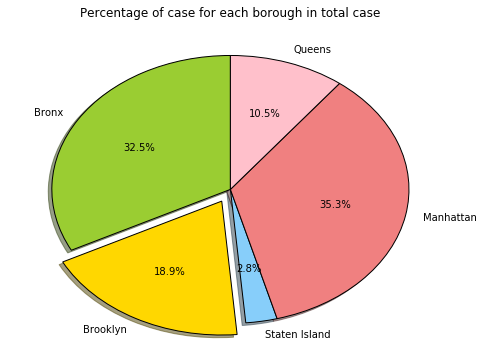

In [16]:
ax = plt.subplot(111)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Percentage of case for each borough in total case')

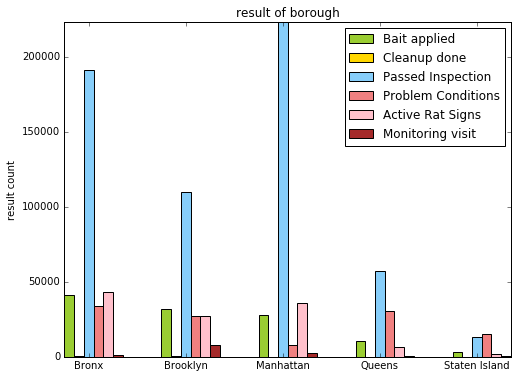

In [18]:
# result in each borough
import numpy as np
def hexbar(labels,y1,y2,y3,y4,y5,y6,title, ylabel):
    ax = plt.subplot(111)
    x =  np.arange(5)
    w = 0.1
    rect1 = ax.bar(x,y1,width=w,color='yellowgreen',align='center')
    rect2 = ax.bar(x+w, y2,width=w,color='gold',align='center')
    rect3 = ax.bar(x+2*w, y3,width=w,color='lightskyblue',align='center')
    rect4 = ax.bar(x+3*w, y4,width=w,color='lightcoral',align='center')
    rect5 = ax.bar(x+4*w, y5,width=w,color='pink',align='center')
    rect6 = ax.bar(x+5*w, y6,width=w,color='brown',align='center')
    ax.legend((rect1[0], rect2[0], rect3[0], rect4[0], rect5[0], rect6[0]), 
              ('Bait applied', 'Cleanup done','Passed Inspection','Problem Conditions',
                'Active Rat Signs','Monitoring visit'))
    ax.set_xticks(x+2*w)
    ax.set_xticklabels( labels )
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.autoscale(tight=True)
    plt.show()

borough = {}
seenBOR = set()
for i in range(0,n) :
    bor = data[i]['BOROUGH']
    result = data[i]['RESULT']
    if bor not in seenBOR:
        borough[bor] = {}
        borough[bor][result] = 1
        seenBOR.add(bor)
    if result not in borough[bor].keys():
        borough[bor][result] = 1
    else:
        borough[bor][result] += 1
        
y1 = [int(borough['Bronx']['Bait applied']), int(borough['Brooklyn']['Bait applied']), 
      int(borough['Manhattan']['Bait applied']), int(borough['Queens']['Bait applied']),
      int(borough['Staten Island']['Bait applied']) ]
y2 = [int(borough['Bronx']['Cleanup done']), int(borough['Brooklyn']['Cleanup done']), 
      int(borough['Manhattan']['Cleanup done']), int(borough['Queens']['Cleanup done']),
      int(borough['Staten Island']['Cleanup done']) ]
y3 = [int(borough['Bronx']['Passed Inspection']), int(borough['Brooklyn']['Passed Inspection']), 
      int(borough['Manhattan']['Passed Inspection']), int(borough['Queens']['Passed Inspection']),
      int(borough['Staten Island']['Passed Inspection']) ]
y4 = [int(borough['Bronx']['Problem Conditions']), int(borough['Brooklyn']['Problem Conditions']), 
      int(borough['Manhattan']['Problem Conditions']), int(borough['Queens']['Problem Conditions']),
      int(borough['Staten Island']['Problem Conditions']) ]
y5 = [int(borough['Bronx']['Active Rat Signs']), int(borough['Brooklyn']['Active Rat Signs']), 
      int(borough['Manhattan']['Active Rat Signs']), int(borough['Queens']['Active Rat Signs']),
      int(borough['Staten Island']['Active Rat Signs']) ]
y6 = [int(borough['Bronx']['Monitoring visit']), int(borough['Brooklyn']['Monitoring visit']), 
      int(borough['Manhattan']['Monitoring visit']), int(borough['Queens']['Monitoring visit']),
      int(borough['Staten Island']['Monitoring visit']) ]

labels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
hexbar(labels,y1,y2,y3,y4,y5,y6,'result of borough','result count')


#### Data cleaning and preprocessing

* Restaurant Inspection

We decided to take the restaurant inspections from 2013-2016. Some entries had the score of -1 or -2 and these entries were deleted from the data. 

* Rodent Inspection

Some entries have the column of "inspection result" empty, or the geographic coordinates were outside of NYC. We will not use those data.

## Theory





#### Machine Learning Tool for Grade


# KNN

We are going to use KNN machine learning to lay a grid over NYC and for each point on the grid we will determine the grade a Chinese restaurant would get in that location.

To do this we will classify the restaurants according to their grade; A, B or C. And then we train a model that determines the grade of each point on the grid according to the class of its 10 nearest neighbors. 

In [23]:
chinese = []
for i in data:
    if i['CUISINE'] == 'Chinese' and i['GRADE'] !='':
        chinese.append(i)

In [24]:
camisSet = set()
for i in data:   
    camisSet.add(i['CAMIS'])

In [25]:
addressSet = set()
for i in data:
    if i['CUISINE'] == 'Chinese':
        addressSet.add((i['BUILDING']+ " " + i['STREET'] + " " + i['BORO'] + " NY",i['DBA'],i['CAMIS']))

We take the adresses and save them in a file.

In [26]:
import csv
field = []

for i in addressSet:
    field.append([i])

with open("AddressChinese.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(field)

We convert the addreses to lon/lat using http://www.findlatitudeandlongitude.com/batch-geocode/#.VyxlAb63sno

Then we open the location file and read from it.

In [28]:
import csv   # get the csv reader
infile = open("ChineseLatLon.csv", 'r')    # open the file for reading
reader = csv.DictReader(infile, delimiter=",")

# define field
lstOfChiAddress = []
address= {}
#
for line in reader:
    address = {'Address':line['Address'],'lat':line['lat'],'lon':line['lon']}
    lstOfChiAddress.append(address)

We combine the geodata with the correct entries.

In [30]:
chi = []
for i in chinese:
    for j in lstOfChiAddress:
        if j['Address'] == i['BUILDING']+ " " + i['STREET'] + " " + i['BORO'] + " NY":
            temp = {'CAMIS':i['CAMIS'],'DBA':i['DBA'], 'CUISINE':i['CUISINE'], 'GRADE':i['GRADE'], 'ADDRESS':i['BUILDING']+ " " + i['STREET'] + " " + i['BORO'] + " NY",
                   'lat':j['lat'], 'lon':j['lon']}
            chi.append(temp)

We take the worst grade that a restaurant has ever got

In [31]:
chiSet = set()
for i in chi:
    chiSet.add((i['CAMIS'],i['DBA'],i['CUISINE'],i['GRADE'],i['ADDRESS'],i['lat'],i['lon']))

In [32]:
camisDict = dict()
for i in chi:
    if i['CAMIS'] not in camisDict:
        camisDict[i['CAMIS']] = i
    elif camisDict[i['CAMIS']]['GRADE'] == 'C':
        continue
    elif camisDict[i['CAMIS']]['GRADE'] == 'A':
        camisDict[i['CAMIS']] = i
    elif camisDict[i['CAMIS']]['GRADE'] == 'B' and i['GRADE'] == 'C':
        camisDict[i['CAMIS']] = i

If there are any lon/lat missing we remove them

In [34]:
li = []
for i in camisDict:
    li.append(i)

for i in li:
    if camisDict[i]['lon'] == '' or camisDict[i]['lat'] == '':
        camisDict.pop(i)

Lets take an equal size for every grade. Otherwise the data is unbalanced.

In [35]:
A = []
B= []
C = []
for i in camisDict:
    if camisDict[i]['GRADE'] == 'A':
        A.append(camisDict[i])
    if camisDict[i]['GRADE'] == 'B':
        B.append(camisDict[i])
    if camisDict[i]['GRADE'] == 'C':
        C.append(camisDict[i])

In [36]:
print len(A)
print len(B)
print len(C)

1149
623
220


In [37]:
import random

chiLoc = dict()
aX = []
aY = []
bX = []
bY = []
cY = []
cX = []

for i in camisDict:
    if camisDict[i]['GRADE'] == 'A':
        aX.append(float(camisDict[i]['lon']))
        aY.append(float(camisDict[i]['lat']))
    if camisDict[i]['GRADE'] == 'B':
        bX.append(float(camisDict[i]['lon']))
        bY.append(float(camisDict[i]['lat']))
    if camisDict[i]['GRADE'] == 'C':
        cX.append(float(camisDict[i]['lon']))
        cY.append(float(camisDict[i]['lat']))
AX = []
AY = []
BX = []
BY = []

#Since there are only 229 restaurants that have ever gotten a C we randomly choose 229 restaurants whith A and 77 with B
for i in range(229):
    AX.append(aX[random.randint(0, len(aX)-1)])
    AY.append(aY[random.randint(0, len(aY)-1)])
    BX.append(bX[random.randint(0, len(bX)-1)])
    BY.append(bY[random.randint(0, len(bY)-1)])
chiLoc['A'] = {'lon':AX, 'lat':AY}
chiLoc['B'] = {'lon':BX, 'lat':BY}
chiLoc['C'] = {'lon':cX, 'lat':cY}

We plot the restaurants on the map to see the distribution

In [39]:
import matplotlib.pyplot as plt
import geoplotlib
import matplotlib

geoplotlib.dot(chiLoc['A'],color='g') # A is represented by green dot
geoplotlib.dot(chiLoc['B'],color='b') # B is represented by blue dot
geoplotlib.dot(chiLoc['C'],color='r') # C is represented by red dot
geoplotlib.inline()

In [40]:
# Use the coordinate to train the knn-classifier

from sklearn import neighbors
import pylab as pl
import numpy as np

n_neighbors = 10

dataX = np.array(AX+BX+cX) 
dataY = np.array(AY+BY+cY)
X = np.column_stack((dataX,dataY))
Y = np.array([0]*len(AX) + [1]*len(BX) + [2]*len(cX))  

knn=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors) # Create classfier object
# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

gridsize = 75
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() , X[:,0].max()
print x_min
print x_max
y_min, y_max = X[:,1].min() , X[:,1].max() 
print y_min
print y_max
hx = (x_max - x_min)/gridsize
hy = (y_max - y_min)/gridsize
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Create the grid point plot

x = xx.flatten()
y = yy.flatten()

predict_aX = []
predict_aY = []
predict_bX = []
predict_bY = []
predict_cX = []
predict_cY = []

Acnt = 0
Bcnt = 0
Ccnt = 0
for ii in range(0,len(x)):
    if Z[ii] == 0:
        Acnt += 1
        predict_aX.append(x[ii])
        predict_aY.append(y[ii])
    if Z[ii] == 1:
        Bcnt += 1
        predict_bX.append(x[ii])
        predict_bY.append(y[ii])
    if Z[ii] == 2:
        Ccnt += 1
        predict_cX.append(x[ii])
        predict_cY.append(y[ii])
print " Prediection of grade when K = %s:\n A :%s (green dot), B:%s (blue dot), C:%s (red dot)" %(n_neighbors,Acnt,Bcnt,Ccnt)     
prediction = {}
prediction['A'] = {"lon":predict_aX, "lat":predict_aY}
prediction['B'] = {'lon':predict_bX, 'lat':predict_bY}
prediction['C'] = {'lon':predict_cX, 'lat':predict_cY}



geoplotlib.dot(prediction['A'],color='g') # Prostitution is represented by red dot
geoplotlib.dot(prediction['B'],color='b') # Prostitution is represented by red dot
geoplotlib.dot(prediction['C'],color='r') # Prostitution is represented by red dot

geoplotlib.inline()

-74.168055
-73.700477
40.510773
40.904449
 Prediection of grade when K = 10:
 A :3144 (green dot), B:1561 (blue dot), C:920 (red dot)


#### Machine Learning Tool for AVPV

the machine learning for this part is based on matlab implementation rather python. It is an implementation of Gaussian process regression

In [41]:
clear all
%%
filename = 'LAT_LON_AVPV_CHINESERESTAURANT.csv';
M = csvread(filename,2,0);
X = M(:,1:2);
y = M(:,3);
N = size(X,1);
%%
m = 128; % size of longitude grid 
n = 64; % size of latitude grid
bbox = [-74.2589, 40.4774, -73.7004, 40.9176]; % east,south,west,north
% [latgrid,longrid] = meshgrid(linspace(-74.2589,-73.7004,64),linspace(40.4774,40.9176,64));
[latgrid,longrid] = meshgrid(linspace(min(X(:,1)),max(X(:,1)),n),linspace(min(X(:,2)),max(X(:,2)),m));
% Xstar = [latgrid(:),longrid(:)];
%% Standardize the training and testing data
mu = mean(X); % mean of training data
we = std(X-repmat(mu,size(X,1),1)); % standard deviation of the training data
Xtrain = X - repmat(mu,size(X,1),1); 
Xtrain = Xtrain./repmat(we,size(Xtrain,1),1);
Xtest = [latgrid(:),longrid(:)] - repmat(mu,m*n,1); 
Xtest = Xtest./repmat(we,m*n,1);
%% Data is assumed to have variance sigma^2
sigma2 = (0.1).^2;
%% Kernel construction
%% Parameter
h = 25;
% k = 25;
% min_lambda = 1.25;
% max_lambda = 2;
% min_theta = 1.25;
% max_theta = 2;
lambda = 2;
theta = 2;
% fp = cell(h,k);
% ML = zeros(h,k);
% for i = 1:h
%     for j = 1:k
% i,j
K   = kernel(Xtrain, Xtrain, lambda, theta) + sigma2 * eye(size(X,1)) ;
Ks = kernel(Xtrain, Xtest, lambda, theta);
% subplot(1,2,1),imagesc(K)
% subplot(1,2,2),imagesc(Ks)
%% Compute conditional mean p(y_* | x, y, x_*)
L = chol(K,'lower');
alpha = L'\(L\y);
% invK = inv(L')*inv(L); % use the back and forwarf substitution
% mu = Ks'*invK*mean_cluster';
fp = Ks'*alpha;
tmp = -0.5*y'*alpha - sum(log(diag(L)))-0.5*N*log(2*pi);
ML= tmp;
%     end
% end
%%
close all
% imagesc(lambda,theta,ML);axis xy;hold on
% [r c] = find(ML == max(max(ML)));
% plot(lambda(r),theta(c),'r.','MarkerSize',10)
% params = [lambda(r),theta(c)];

r = fp < 0.1;
fs = fp;fs(r) = 0;
figure,title('Before zero the minus AVPV')
mesh(latgrid,longrid,reshape(fp,m,n)),hold on;
plot3(X(:,1),X(:,2),y,'k.','MarkerSize',10);
xlabel('latitude');ylabel('lontitude');zlabel('AVPV')

figure,title('Before zero the minus AVPV')
mesh(latgrid,longrid,reshape(fs,m,n)),hold on;
plot3(X(:,1),X(:,2),y,'k.','MarkerSize',10);
xlabel('latitude');ylabel('lontitude');zlabel('AVPV')

csvwrite_with_headers('AVPV_predict.csv',[[latgrid(:),longrid(:)],fs],{'LAT','LON','AVPV'})

SyntaxError: invalid syntax (<ipython-input-41-af736a3f7540>, line 1)

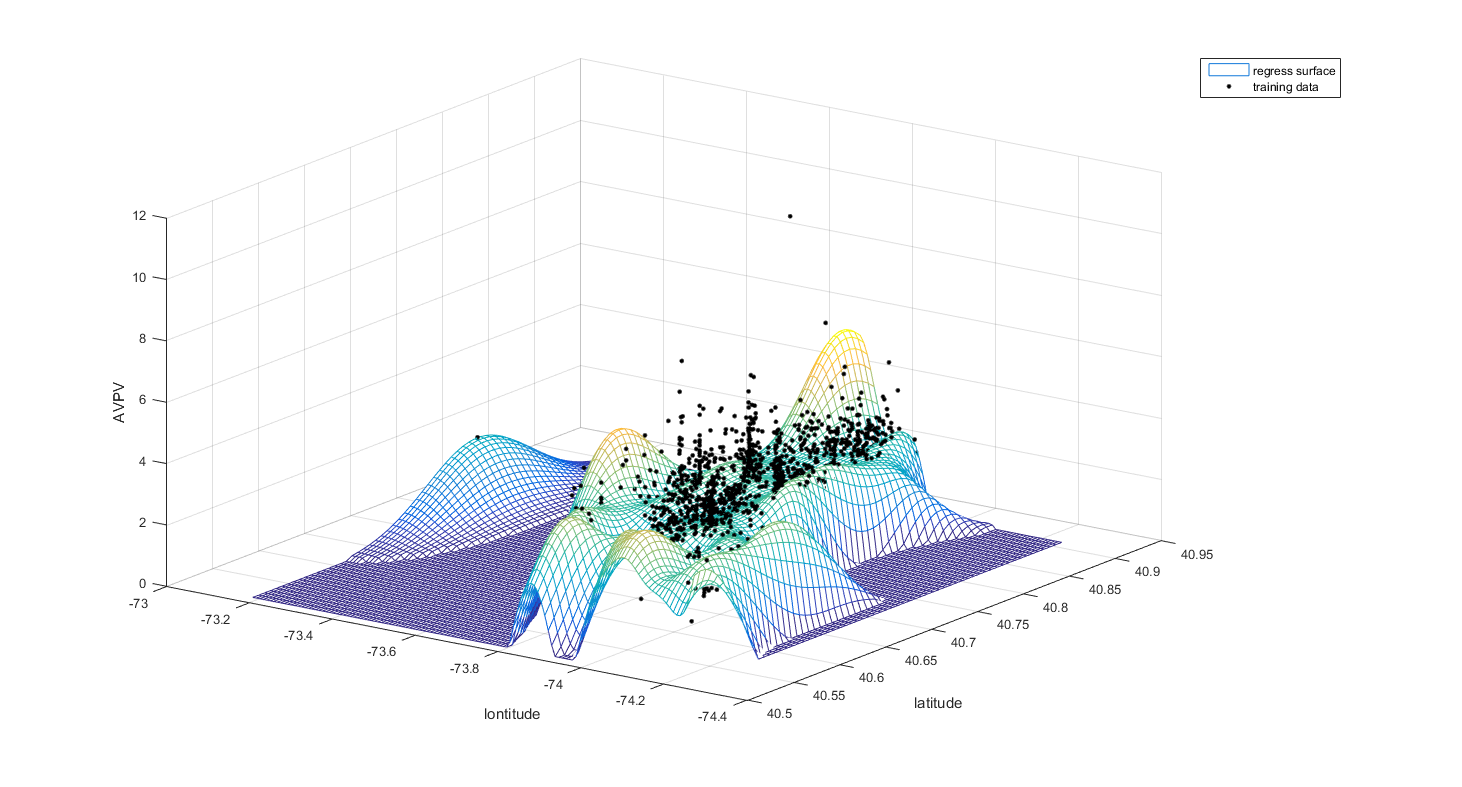

In [20]:
from IPython.display import Image
Image("./gpregress.png")

#### Model Selection

* How do you split the data to training/test set

* Do you use cross-validation


** GP regression**

For this part, we use the full data as training data and the parameter optimization is based on maximum likelihood
where is this part of code doing:

$tmp = -0.5*y'*alpha - sum(log(diag(L)))-0.5*N*log(2*pi)$;

## Visualizations

#### Visualization Tool

* AVPV barchart:

For this plot we calculate the AVPV of each cuisine, and then minus the difference of average cuisine. So the user could easily see what is the restaurant have less or greater violation in a genral sense

* AVPV map:

The user could pick out location in a any grid point on the map, and thus one could see the AVPV of Chinese restaurant across NYC.

* Pie Chart of Cuisines

The pie chart is important because it shows the distribution of the number of restaurants in each cuisine. Thus allowing the user to get a better sense of the dataset.

* Grade map

One of our main goals was to figure out if certain areas were more likely than other to get a good grade. By plotting our findings with KNN on a map of NYC we allow the user to see clusters of 3 different grades distributed in NYC.

## Discussion. Think critically about your creation

#### What did not go according to plan
* The violations count is not completely corredlated to the grade of a restaurant
* The AVPV map is not well related to grade map.
* The rodent inspection is not correlated to the restaurant dataset

#### What went well
* The Knn algorithm provided good clusters of the grades and the model seemed to succesfully classify to dots on the grid.
